**Fuente**
CNMV (Comisión nacional del mercado de valores

**Información**
Presencia de mujeres en los consejos de administración y en la alta dirección de las sociedades cotizadas

**Enlace**
http://www.cnmv.es/portal/Publicaciones/Consejeras_Directivas.aspx

In [1725]:
import os
import pandas as pd
import numpy as np

In [1726]:
origPath = '../data/raw_data/women_boards_spain/'
fileList = os.listdir(origPath)[1:]
completeFileList = [(origPath + elem) for elem in fileList]
completeFileList

['../data/raw_data/women_boards_spain/women_boards_spain_2018.xlsx',
 '../data/raw_data/women_boards_spain/women_boards_spain_2019.xlsx',
 '../data/raw_data/women_boards_spain/women_boards_spain_2020.xlsx',
 '../data/raw_data/women_boards_spain/women_boards_spain_2021.xlsx',
 '../data/raw_data/women_boards_spain/women_boards_spain_2017.xlsx']

In [1727]:
years = [int(elem[-9:-5]) for elem in completeFileList]
years

[2018, 2019, 2020, 2021, 2017]

In [1728]:
sheetList = [pd.ExcelFile(elem).sheet_names for elem in completeFileList]
sheetList

[['Export Summary', 'Summary', 'IBEX 35', '> 500M', '< 500 M €'],
 ['Export Summary', 'Summary', 'IBEX 35', '> 500M', '< 500 M'],
 ['Export Summary', 'Summary', 'IBEX 35', '> 500M', '< 500M'],
 ['Export Summary', 'Resumen', 'IBEX 35', '> 500M', '< 500M', 'Hoja1'],
 ['Export Summary', 'Summary', 'IBEX 35', '> 500M', '< 500M']]

In [1729]:
sheetList = [elem[1:5] for elem in sheetList]
sheetList

[['Summary', 'IBEX 35', '> 500M', '< 500 M €'],
 ['Summary', 'IBEX 35', '> 500M', '< 500 M'],
 ['Summary', 'IBEX 35', '> 500M', '< 500M'],
 ['Resumen', 'IBEX 35', '> 500M', '< 500M'],
 ['Summary', 'IBEX 35', '> 500M', '< 500M']]

In [1730]:
keyNames = sheetList[-1]
keyNames

['Summary', 'IBEX 35', '> 500M', '< 500M']

In [1731]:
allData = {}
for elem in completeFileList:
    sheetList = pd.ExcelFile(elem).sheet_names
    sheetData = {keyNames[v]:pd.read_excel(elem, k, dtype=str) for (k,v) in zip(sheetList[1:5], range(4))}
    allData[int(elem[-9:-5])] = sheetData

In [1732]:
allData[2021]['Summary'].head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WOMAN PRESENCE IN BOARD OF DIRECTORS AND KEY ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1733]:
allDataSum = allData[2021]['Summary']
allDataSum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WOMAN PRESENCE IN BOARD OF DIRECTORS AND KEY ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1734]:
allDataSum = allDataSum[allDataSum.isnull().sum(axis=1) < 7]
allDataSum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
12,NaN,2017,NaN,2018,NaN,2019,NaN,2020,NaN,2021,NaN
13,NaN,Number,%,Number,%,Number,%,Number,%,Number,%
14,Total,258,0.189,272,0.199,299,0.231962761830877,331,0.261,357,0.2926
15,Propietary,72,0.157,73,0.153172866520788,74,0.175771971496437,87,0.2102,90,0.2356
16,Executive,10,0.045,10,0.0430622009569378,11,0.0541871921182266,11,0.055,12,0.0642


In [1735]:
allDataSumCols = allDataSum.columns
allDataSumCols

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [1736]:
newColumns = ['Position','2017_N','2017_P','2018_N','2018_P','2019_N','2019_P','2020_N','2020_P','2021_N','2021_P']

columnsNames = dict(zip(allDataSumCols, newColumns))

In [1737]:
allDataSum.rename(columns=columnsNames, inplace=True)
allDataSum = allDataSum[2:]
allDataSum.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Position,2017_N,2017_P,2018_N,2018_P,2019_N,2019_P,2020_N,2020_P,2021_N,2021_P
14,Total,258,0.189,272,0.199,299,0.231962761830877,331,0.261,357,0.2926
15,Propietary,72,0.157,73,0.153172866520788,74,0.175771971496437,87,0.2102,90,0.2356
16,Executive,10,0.045,10,0.0430622009569378,11,0.0541871921182266,11,0.055,12,0.0642
17,Independent,163,0.281,178,0.306759098786828,202,0.355008787346221,219,0.39,242,0.4368
18,Other,13,0.122,11,0.0982142857142857,12,0.125,14,0.154,13,0.146067415730337


In [1738]:
cols = allDataSum.columns.drop(['Position'])

allDataSumMelt = pd.melt(allDataSum, id_vars=['Position'], value_vars=cols,
    var_name=['Date'], value_name='Value')

allDataSumMelt.head()

,Position,Date,Value
0,Total,2017_N,258
1,Propietary,2017_N,72
2,Executive,2017_N,10
3,Independent,2017_N,163
4,Other,2017_N,13


In [1739]:
allDataSumMelt[['Year','Indicator']] = allDataSumMelt.Date.str.split("_", expand = True)
allDataSumMelt.drop(columns=['Date'],inplace=True)

In [1740]:
allDataSumMelt.head()

,Position,Value,Year,Indicator
0,Total,258,2017,N
1,Propietary,72,2017,N
2,Executive,10,2017,N
3,Independent,163,2017,N
4,Other,13,2017,N


In [1741]:
allDataSumMelt['Number'] = np.where(allDataSumMelt["Indicator"] == 'N', allDataSumMelt['Value'], 0)
allDataSumMelt['Percentage'] = np.where(allDataSumMelt["Indicator"] == 'P', allDataSumMelt['Value'], 0)
allDataSumMelt.drop(columns=['Value', 'Indicator'], inplace=True)
allDataSumMelt.head()

,Position,Year,Number,Percentage
0,Total,2017,258,0
1,Propietary,2017,72,0
2,Executive,2017,10,0
3,Independent,2017,163,0
4,Other,2017,13,0


In [1742]:
cols = allDataSumMelt.columns.drop(['Position'])
allDataSumMelt[cols] = allDataSumMelt[cols].apply(pd.to_numeric, errors='coerce')

In [1743]:
allDataSumMeltGroup = allDataSumMelt.groupby(['Position','Year']
                               ).agg({'Number': 'sum', 'Percentage': 'sum'}
                               ).reset_index()
allDataSumMeltGroup.head()

,Position,Year,Number,Percentage
0,Executive,2017,20.0,0.179300
1,Executive,2018,20.0,0.178116
2,Executive,2019,22.0,0.216636
3,Executive,2020,22.0,0.219000
4,Executive,2021,24.0,0.252800


In [1744]:
for yearKey,value in allData.items():
    for sheetKey,value in allData[yearKey].items():
        if sheetKey == sheetList[2] or sheetKey == sheetList[3] or sheetKey == sheetList[4]:
            allData[yearKey][sheetKey].dropna(how='all', inplace=True)
            allData[yearKey][sheetKey].columns = allData[yearKey][sheetKey].iloc[2]
            allData[yearKey][sheetKey] = allData[yearKey][sheetKey].iloc[3:]
            allData[yearKey][sheetKey]['Year'] = yearKey

            columnsErr = allData[yearKey][sheetKey].columns.values
            
            for index, elem in enumerate(columnsErr):

                columnsErr[index] = " ".join(elem.split())
                
                if 'numberof' in elem:
                    columnsErr[index] = elem.replace('numberof', 'number of')

            allData[yearKey][sheetKey].columns = columnsErr

            allData[yearKey][sheetKey].Name = np.where(allData[yearKey][sheetKey].Name == 'TOTALES', 'TOTAL', allData[yearKey][sheetKey].Name)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [1745]:
allData[2017]['IBEX 35'].tail()

,Name,Total board members,Number of women board members,% women board members,Total number of executive board members,Number of women executive board members,% women over total executive board members,Total number of proprietary board members,Number of women proprietary board members,% women over total proprietary board members,Total number of independent board members,Number of women independent board members,% women over total independent board members,Total number of other external board members,Number of women other external board members,% women over total other external board members,Number of key executives no members of the board,Number of women key executives no members of the board,% total women key executives no members of the board,Year
34,"SIEMENS GAMESA RENEWABLE ENERGY, S.A.",12,6,0.5,2,0,0,6,4,0.666666666666667,4,2,0.5,0,0,0,7,0,0,2017
35,"TECNICAS REUNIDAS, S.A.",13,1,0.0769230769230769,2,0,0,2,0,0,8,1,0.125,1,0,0,12,2,0.166666666666667,2017
36,"TELEFONICA, S.A.",16,3,0.1875,2,0,0,4,0,0,9,2,0.222222222222222,1,1,1,5,1,0.2,2017
37,"VISCOFAN, S.A.",10,1,0.1,2,0,0,2,0,0,4,0,0,2,1,0.5,21,3,0.142857142857143,2017
39,TOTAL,452,103,0.22787610619469,71,3,0.0422535211267606,115,19,0.165217391304348,227,77,0.33920704845815,39,4,0.102564102564103,434,62,0.142857142857143,2017


In [1746]:
ibex35 = pd.concat([allData[elem]['IBEX 35'] for elem, value in allData.items()], ignore_index=True).sort_values(by=['Name','Year'])
over500 = pd.concat([allData[elem]['> 500M'] for elem, value in allData.items()], ignore_index=True).sort_values(by=['Name','Year'])
under500 = pd.concat([allData[elem]['< 500M'] for elem, value in allData.items()], ignore_index=True).sort_values(by=['Name','Year'])

allLevels = [ibex35, over500, under500]

In [1747]:
companies = {'Industria De Diseño Textil': 'Inditex',
             'Acs': 'Grupo ACS',
             'Amadeus It Group': 'Amadeus',
             'Cie Automotive': 'CIE Automotive',
             'Banco Bilbao Vizcaya Argentaria': 'BBVA',
             'Banco De Sabadell': 'Banco Sabadell',
             'Indra Sistemas': 'Indra',
             'International Consolidated Airlines Group': 'IAG',
             'Laboratorios Farmaceuticos Rovi': 'Rovi',
             'Melia Hotels International': 'Melia Hotels',
             'Naturgy Energy Group': 'Naturgy',
             'Red Electrica Corporacion': 'Red Electrica',
             'Siemens Gamesa Renewable Energy': 'Siemens Gamesa',
             'Solaria Energia Y Medioambiente': 'Solaria',
             'Amrest Holdings': 'AmRest',
             'Alantra Partners': 'Alantra',
             'Applus Services': 'Applus+',
             'Atresmedia Corporacion De Medios De Comunicacion': 'Atresmedia',
             'Compañia De Distribucion Integral Logista Holdings': 'Logista Holdings',
             'Corporacion Acciona Energias Renovables': 'Acciona Energy',
             'Distribuidora Internacional De Alimentacion': 'Dia',
             'Global Dominion Access': 'Dominion Global',
             'Linea Directa Aseguradora': 'Linea Directa',
             'Mediaset España Comunicacion': 'Mediaset España',
             'Miquel Y Costas & Miquel': 'Miquel Y Costas',
             'Obrascon Huarte Lain': 'OHLA',
             'Realia Business': 'Realia',
             'Construcciones Y Auxiliar De Ferrocarriles': 'CAF',
             'Desarrollos Especiales De Sistemas De Anclajes': 'DESA',
             'Compañia Levantina De Edificacion Y Obras Publicas': 'Cleo',
             'Compañia Española De Viviendas En Alquiler': 'Cevasa',
             'General De Alquiler De Maquinaria': 'GAM',
             'Grupo Empresarial San Jose': 'Grupo San Jose',
             'Minerales Y Productos Derivados': 'Minersa',
             'Nueva Expresión Textil': 'Nextil',
             'Renta Corporacion Real Estate': 'Renta Corporacion',
             'Union Catalana De Valores': 'Uncavasa',
             'Airtificial Intelligence Structures': 'Airtificial',
             'Arima Real Estate Socimi': 'Arima Real Estate',
             'Iberpapel Gestion': 'Iberpapel',
             'Lar España Real Estate Socimi': 'Lar España',
             'Promotora De Informaciones': 'Grupo Prisa',
             'Corporacion Empresarial De Materiales De Construccion': 'COEMAC',
             'Tr Hotel Jardin Del Mar': 'TRH Jardin Del Mar',
             'Bolsas Y Mercados Españoles': 'BME',
             'Solarpack Corporacion Tecnologica': 'Solarpack',
             'Hispania Activos Inmobiliarios Socimi': 'Hispania Activos Inmobiliarios',
             'Parques Reunidos Servicios Centrales': 'Parques Reunidos',
             'Telepizza Group': 'Telepizza',
             'Service Point Solutions': 'Service Point'}

In [1748]:
for df in allLevels:   
    colsFloat = [elem for elem in list(df.columns) if '%' in elem]
    colsInt = [elem for elem in list(df.columns) if '%' not in elem and 'Name' not in elem and 'Year' not in elem]

    df[colsFloat] = df[colsFloat].astype(float)
    df[colsInt] = df[colsInt].fillna(0).astype(int)
    df['Name'] = df['Name'].astype(str)

    df['Name'] = df['Name'].str.split(',').str[0]
    df['Name'] = df['Name'].apply(lambda x:x.lower())
    df['Name'] = df['Name'].str.title()

    df['Name'] = df['Name'].apply(lambda x: x.replace(' S.A.', ''))
    df['Name'] = df['Name'].apply(lambda x: x.replace('Industria De Diseño Textil', 'Inditex'))

    for key, value in companies.items():
        df.Name = np.where(df.Name == key, companies[key], df.Name)

In [ ]:
def pie_plot_inside_grid4(data1, data2, ax_number, title):
    '''
    Función que crea un pie plot preparado para estar dentro de un grid de 4x4
    '''
    csfont = {'fontname':'PP Neue Montreal'}

    data = [data1, data2]
    colors = [c('red'), c('grey2')]
    pie_plot_total = ax_number.pie(data, colors = colors, autopct='%.0f%%', wedgeprops={"edgecolor":"white"})
    return pie_plot_total

In [1751]:
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [1752]:
# Import necessary fonts
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
font_manager.findfont("PP Neue Montreal")

'/Users/laurabarreda/Library/Fonts/PPNeueMontreal-Book.otf'

In [1753]:
# Define styling
def visStyling():
    '''
    This function defines the styling rules of the data visualization
    '''
    enmax_palette = ["#c5c5c5", "#f54939", "#2018c2", '#a1a1a1', '#838383']
    color_codes_wanted = ['grey1', 'red', 'blue', 'grey2', 'grey3']
    c = lambda x: enmax_palette[color_codes_wanted.index(x)]
    color_pair = [c('red'), c('grey2')]
    mpl.rcParams['font.sans-serif'] = 'PP Neue Montreal'
    # plt.rc('legend',fontsize=20)
    plt.rc('legend',edgecolor='white')
    plt.rc('legend',facecolor=c('grey1'))
    plt.rc('font', size=20) 

    return enmax_palette, color_codes_wanted, c, color_pair, mpl.rcParams

enmax_palette, color_codes_wanted, c, color_pair, mpl.rcParams = visStyling()

In [1754]:
def pie_plot_inside_grid4(data1, data2, ax_number, title):
    '''
    Función que crea un pie plot preparado para estar dentro de un grid de 4x4
    '''
    csfont = {'fontname':'PP Neue Montreal'}

    data = [data1, data2]
    colors = [c('red'), c('grey2')]
    pie_plot_total = ax_number.pie(data, colors = colors, autopct='%.0f%%', wedgeprops={"edgecolor":"white"})
    return pie_plot_total

In [1803]:
def getPiePlotData(df):
    womenBoard = df.loc[(df['Year'] == 2021) &
                        (df['Name'] == 'Total'), 'Number of women board members'].values[0]
    totalBoard = df.loc[(df['Year'] == 2021) &
                        (df['Name'] == 'Total'), 'Total board members'].values[0]
    return womenBoard, (totalBoard - womenBoard)

In [1807]:
getPiePlotData(ibex35)[0]

144

Text(0.5, 0.98, 'Percentage of women in largest company boards (Spain)')

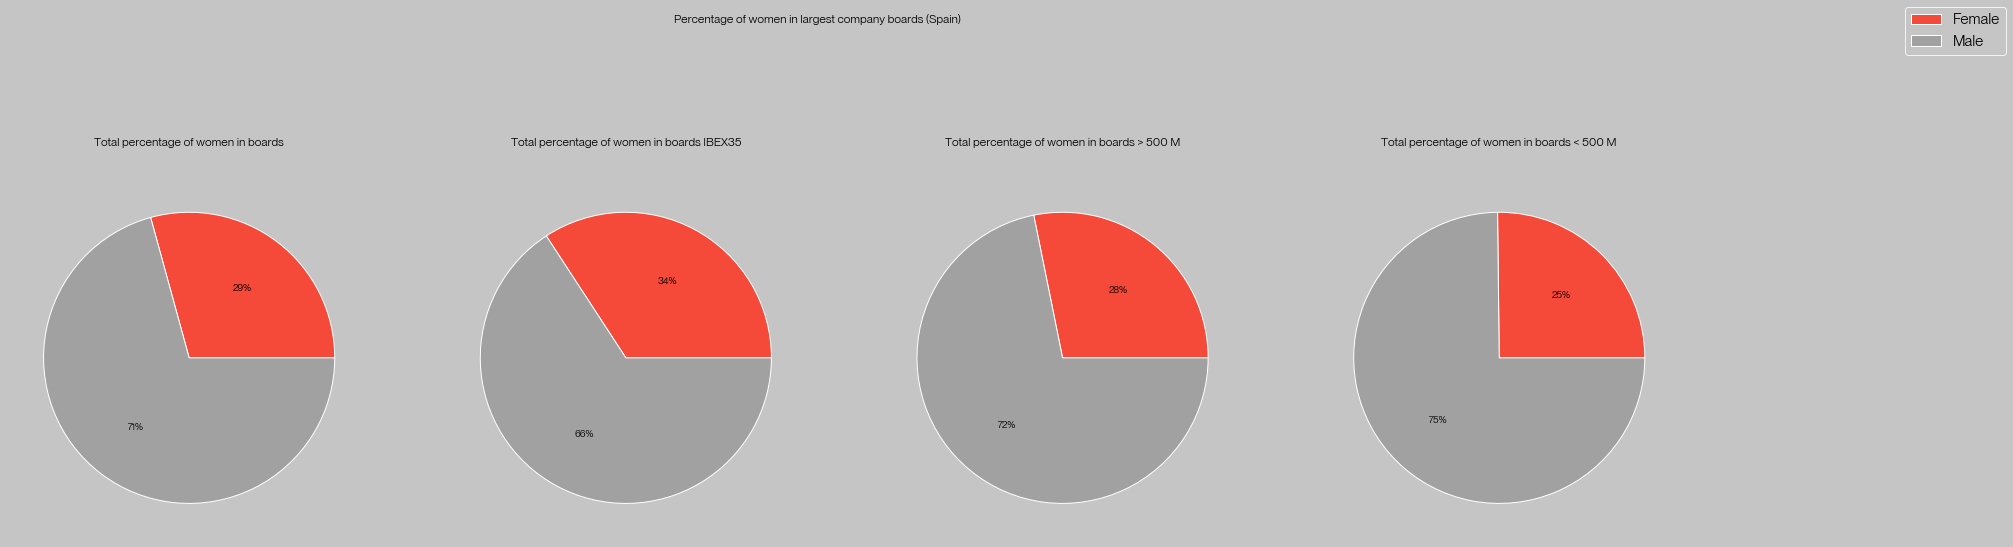

In [1819]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(30, 10), facecolor=c("grey1"))
labels = ['Female', 'Male']
# (ax1, ax2, ax3, ax4).set_facecolor(c("grey1"))

totalPerWomen = getPiePlotData(ibex35)[0] + getPiePlotData(over500)[0] + getPiePlotData(under500)[0]
totalPerMen = getPiePlotData(ibex35)[1] + getPiePlotData(over500)[1] + getPiePlotData(under500)[1]

pie_plot_inside_grid4(totalPerWomen, totalPerMen, ax1, 'hola');
pie_plot_inside_grid4(getPiePlotData(ibex35)[0], getPiePlotData(ibex35)[1], ax2, 'hola');
pie_plot_inside_grid4(getPiePlotData(over500)[0], getPiePlotData(over500)[1], ax3, 'hola');
pie_plot_inside_grid4(getPiePlotData(under500)[0], getPiePlotData(under500)[1], ax4, 'hola');

ax1.set_title("Total percentage of women in boards", pad=30)
ax2.set_title("Total percentage of women in boards IBEX35", pad=30)
ax3.set_title("Total percentage of women in boards > 500 M", pad=30)
ax4.set_title("Total percentage of women in boards < 500 M", pad=30)
plt.figlegend(labels=labels,loc = 2, bbox_to_anchor = (1,1), prop={'size': 15}, facecolor=c('grey1'), edgecolor='white');
plt.suptitle('Percentage of women in largest company boards (Spain)')

In [ ]:
ibex35.mask(df > 10, -25)


In [ ]:
df = pd.DataFrame({'Women': [women_total_new['2017 %'][0], ibex_35_total_new['2017 %'][0], over_500_total_new['2017 %'][0], under_500_total_new['2017 %'][0]],
                   'Men': [women_total_new['2017 %'][1], ibex_35_total_new['2017 %'][1], over_500_total_new['2017 %'][1], under_500_total_new['2017 %'][1]]},
                  index=['TOTAL', 'IBEX35', 'OVER500', 'UNDER500'])

df2 = pd.DataFrame({'Women': [women_total_new['2021 %'][0], ibex_35_total_new['2021 %'][0], over_500_total_new['2021 %'][0], under_500_total_new['2021 %'][0]],
                   'Men': [women_total_new['2021 %'][1], ibex_35_total_new['2021 %'][1], over_500_total_new['2021 %'][1], under_500_total_new['2021 %'][1]]},
                  index=['TOTAL', 'IBEX35', 'OVER500', 'UNDER500'])

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(30, 18), facecolor=c("grey1"))

df.plot(kind='barh', stacked=True, color=[c('red'), c('grey2')], ax=ax1)
# ax.set_facecolor(c("grey1"))
plt.grid(color='white', linestyle='-.', linewidth=.2)

df2.plot(kind='barh', stacked=True, color=[c('red'), c('grey2')], ax=ax2)
# ax.set_facecolor(c("grey1"))
plt.grid(visible=False)

plt.figlegend(labels=labels,loc = 2, bbox_to_anchor = (1,1), prop={'size': 15}, facecolor=c('grey1'), edgecolor='white');
plt.legend([],[], frameon=False)

fig.text(0.5, 0.04, 'Percentage', ha='center');
fig.text(0.04, 0.5, '2017                                                               2021', va='center', rotation='vertical');
plt.suptitle('Women and men percentage in boards of largest companies, 2017 and 2021')